In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [72]:
with open(f'../../../loss/ResDepth_addition_v3.pkl', 'rb') as f:
        experiment_data = pickle.load(f)

In [20]:
np.mean(experiment_data['r0_baseline'])

0.0011679441413434688

In [73]:
for key, value in experiment_data['r1'].items():
    print(f'{key}, mean: {np.mean(value)}, std: {np.std(value)}')
    stat_val, p_val = ttest_ind(experiment_data['r0_baseline'], value, equal_var=False)
    print(p_val)

('green',), mean: 0.00116377732847468, std: 0.00012952851455872761
0.9329868358257911
('red',), mean: 0.001141444520908408, std: 0.00012405479294031946
0.5879499323657114
('nir',), mean: 0.0011535869183717296, std: 0.00014539302725409786
0.781889522019497
('swir1',), mean: 0.0010274261665472295, std: 0.00014495284625690784
0.0095682951043915
('swir2',), mean: 0.0010260442129947478, std: 0.00010981709760601046
0.004603319771021566
('ndvi',), mean: 0.0011251413190620952, std: 0.00015152252608590636
0.41921673442208585
('ndsi',), mean: 0.0010819686180184363, std: 0.00015077556678147808
0.10851536969300302
('ndwi',), mean: 0.0011308350396575407, std: 0.00017308153044790596
0.5101027645900003
('fcf',), mean: 0.001096284302911954, std: 0.0001349968281596574
0.160169673928406
('aspect',), mean: 0.0011140486007207074, std: 0.00010410513975551942
0.24930564434416452
('eastness',), mean: 0.0011411030565795955, std: 0.00011996120336342846
0.5789708953238413
('curvature',), mean: 0.001036768840276

In [74]:
experiment_data['r1'][('latitude',)]

[0.0009883345192065462,
 0.0010156722855754197,
 0.0013734593376284465,
 0.0012460699945222586,
 0.0011129684862680733,
 0.0009921243618009612,
 0.0009730341407703236,
 0.001107937510823831]

In [75]:
dic_for_df = experiment_data['r1']
dic_for_df[('core_features',)] = experiment_data['r0_baseline']

In [73]:
# df.mean() - df.core_features.mean()

In [76]:
r1_df = pd.DataFrame.from_dict(dic_for_df, orient='index').transpose()
r1_df.columns = [col[0] for col in r1_df.columns]
medians = r1_df.median()
sorted_columns = medians.sort_values().index
r1_df = r1_df[sorted_columns]

improved_list = []
worse_list = []
core_median = np.median(experiment_data['r0_baseline'])
for key, value in experiment_data['r1'].items():
    stat_val, p_val = ttest_ind(experiment_data['r0_baseline'], value, equal_var=False)
    feature_median = np.median(value)
    if feature_median < core_median:
        improved_list.append([key[0], p_val])
    else:
        worse_list.append([key[0], p_val])

improved_sorted = sorted(improved_list, key=lambda x: x[1], reverse=False)
worse_sorted = sorted(worse_list, key=lambda x: x[1], reverse=True)

improved_names = [item[0] for item in improved_sorted]
worse_names = [item[0] for item in worse_sorted]
sorted_columns = improved_names + worse_names

r1_df = r1_df[sorted_columns]

Text(0.5, 1.0, 'Validation MSE loss when feature is included with core features')

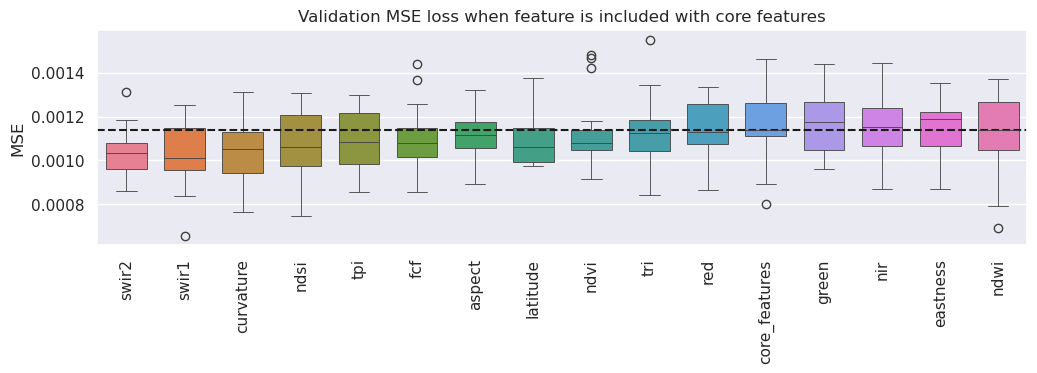

In [77]:
sns.set_theme()
f, ax = plt.subplots(figsize=(12, 2.8))
sns.boxplot(data=r1_df, ax=ax, linewidth=0.6, width=0.7)
#sns.swarmplot(data=df, s=3, ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.axhline(r1_df.core_features.median(), c='k', linestyle='--')
ax.set_ylabel('MSE')
ax.set_title('Validation MSE loss when feature is included with core features')

#plt.savefig('../../figs/addition_MSE_change.png', dpi=400, bbox_inches="tight")

In [82]:
for key, value in experiment_data['r2'].items():
    print(f'{key}, mean: {np.mean(value)}, std: {np.std(value)}')
    stat_val, p_val = ttest_ind(r1_df[r1_df.mean().idxmin()], value, equal_var=False)
    print(p_val)

('green', 'red'), mean: 0.0013085251877782867, std: 0.000172926255332703
0.0025535510623337157
('green', 'swir1'), mean: 0.0012402322558045854, std: 0.00017510718460804156
0.08052931711990788
('green', 'swir2'), mean: 0.001258214341942221, std: 0.00013894195808030027
0.015315181450421898
('green', 'ndsi'), mean: 0.001254605631402228, std: 0.00015720002512568113
0.029625684773596478
('green', 'ndwi'), mean: 0.0012534863533801399, std: 0.00020709653083048223
0.07630344794628882
('green', 'fcf'), mean: 0.0012034119587042368, std: 0.00012203057154705871
0.20323003431075537
('green', 'slope'), mean: 0.0012719582278805318, std: 0.00015194994039729616
0.010024267884907848
('green', 'aspect'), mean: 0.0012416098979883827, std: 0.0001479830329746041
0.047326440576394166
('green', 'northness'), mean: 0.0011914532748050987, std: 0.00015799330232887457
0.409076591844834
('green', 'curvature'), mean: 0.00118141406273935, std: 0.00014222858934302603
0.5186365458267954
('green', 'tri'), mean: 0.00129

In [83]:
dic_for_df = experiment_data['r2']
dic_for_df[('core_features',)] = experiment_data['r0_baseline']

In [84]:
r2_df = pd.DataFrame.from_dict(dic_for_df, orient='index').transpose()
r2_df.columns = [f'{col}' for col in r2_df.columns]
medians = r2_df.median()
sorted_columns = medians.sort_values().index
r2_df = r2_df[sorted_columns]

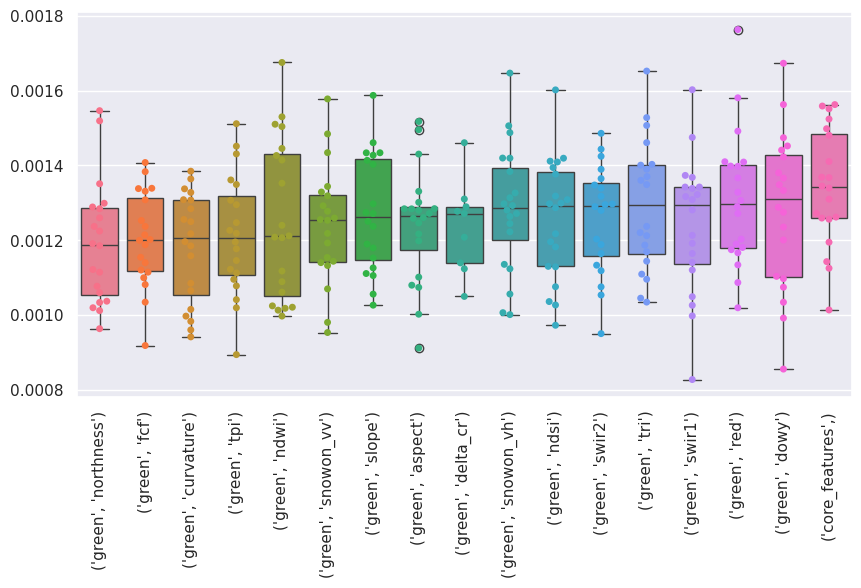

In [85]:
sns.set_theme()
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=r2_df, ax=ax)
sns.swarmplot(data=r2_df, ax=ax)
ax.tick_params(axis='x', rotation=90)
#ax.axhline(df.core_features.median(), c='r')